In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
wines_df = pd.read_csv("WineQT.csv")
wines_df.sample(frac=1).reset_index(drop=True)

wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
display(wines_df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

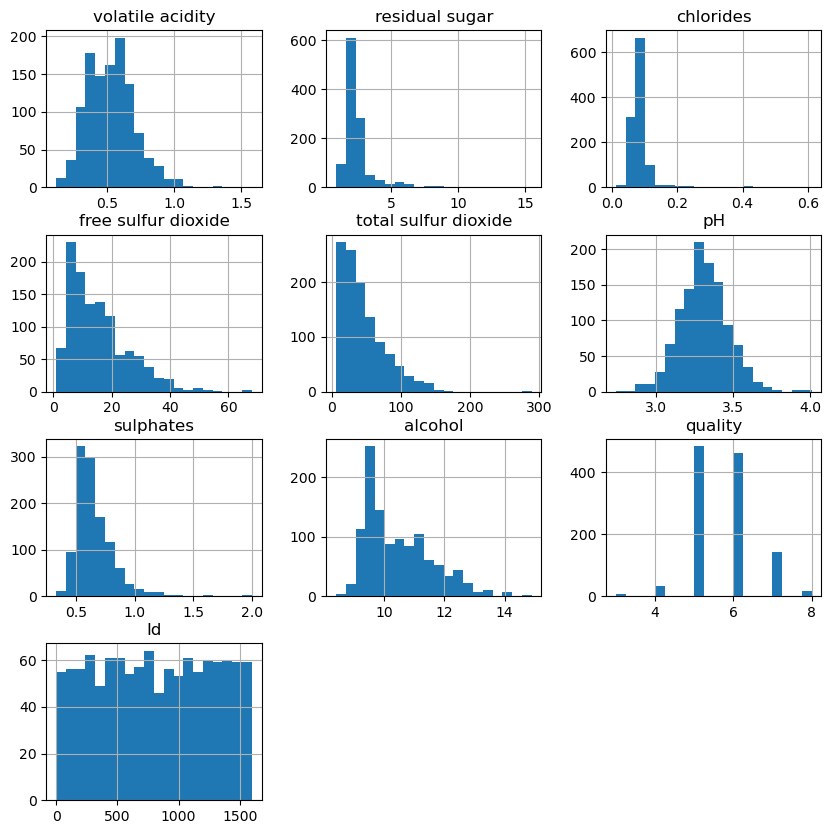

In [13]:
wines_df.hist(bins=20, figsize=(10, 10))
plt.show()

<AxesSubplot:>

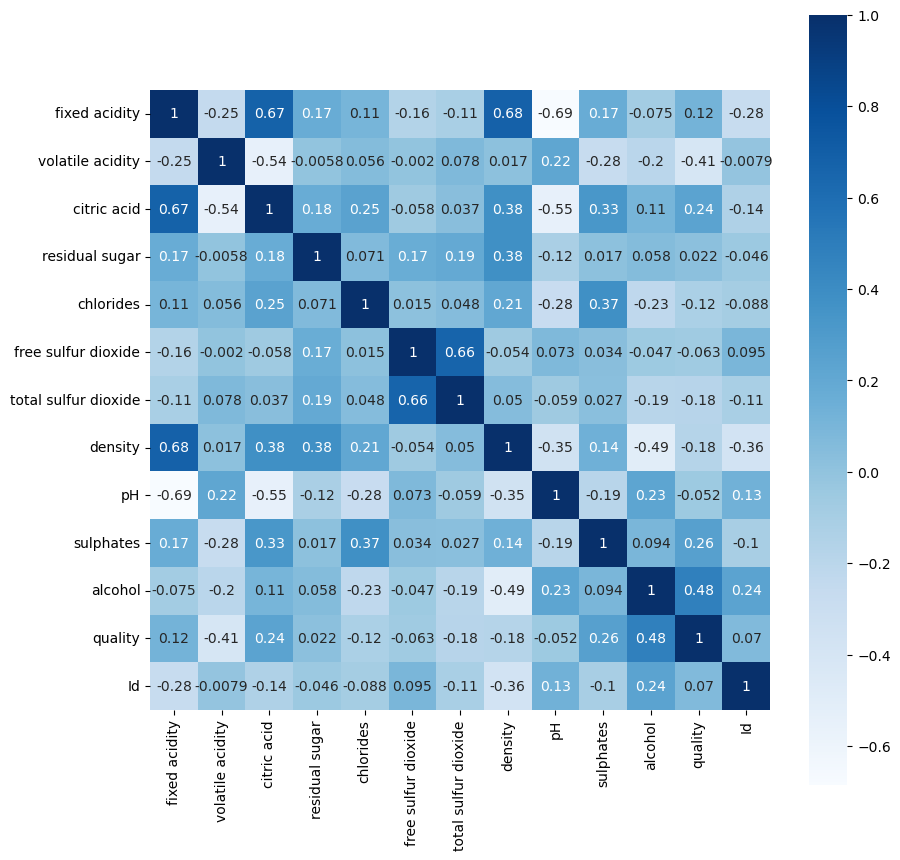

In [5]:
correlation = wines_df.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

In [6]:
wines_df_before = wines_df
wines_df_after = wines_df.drop(['fixed acidity','citric acid','density'], axis = 1)

X1 = sm.tools.add_constant(wines_df_before)
X2 = sm.tools.add_constant(wines_df_after)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

display(series_before)
display(series_after)

wines_df = wines_df_after

const                   1.717220e+06
fixed acidity           7.932708e+00
volatile acidity        1.880626e+00
citric acid             3.234832e+00
residual sugar          1.745375e+00
chlorides               1.555745e+00
free sulfur dioxide     1.989297e+00
total sulfur dioxide    2.239680e+00
density                 6.617701e+00
pH                      3.451937e+00
sulphates               1.503930e+00
alcohol                 3.442722e+00
quality                 1.599447e+00
Id                      1.255967e+00
dtype: float64

const                   654.506378
volatile acidity          1.338463
residual sugar            1.081854
chlorides                 1.378799
free sulfur dioxide       1.939556
total sulfur dioxide      2.010007
pH                        1.291337
sulphates                 1.406049
alcohol                   1.564804
quality                   1.597713
Id                        1.138656
dtype: float64

In [7]:
x = np.array(wines_df.loc[:, wines_df.columns != 'quality'])
y = np.array(wines_df['quality'])

In [8]:
desc_df = wines_df.describe()

desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.531339,2.532152,0.086933,15.615486,45.914698,3.311015,0.657708,10.442111,5.657043,804.969379
std,0.179633,1.355917,0.047267,10.250486,32.782130,0.156664,0.170399,1.082196,0.805824,463.997116
min,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000,0.000000
25%,0.392500,1.900000,0.070000,7.000000,21.000000,3.205000,0.550000,9.500000,5.000000,411.000000
50%,0.520000,2.200000,0.079000,13.000000,37.000000,3.310000,0.620000,10.200000,6.000000,794.000000
75%,0.640000,2.600000,0.090000,21.000000,61.000000,3.400000,0.730000,11.100000,6.000000,1209.500000
max,1.580000,15.500000,0.611000,68.000000,289.000000,4.010000,2.000000,14.900000,8.000000,1597.000000
+3_std,1.070238,6.599905,0.228735,46.366944,144.261089,3.781007,1.168904,13.688698,8.074516,2196.960728
-3_std,-0.007561,-1.535600,-0.054869,-15.135973,-52.431693,2.841023,0.146512,7.195525,3.239570,-587.021970


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)

print(x_train.shape, x_test.shape)

(1028, 9) (115, 9)


In [10]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_predict = regression_model.predict(x_test)
y_predict = np.round(y_predict)

sum = 0
for i,n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1
print(sum/len(y_test))

0.6347826086956522
